/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-4-29 Python-3.11.12 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 132MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


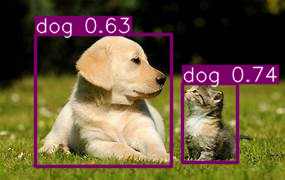

         xmin       ymin        xmax        ymax  confidence  class name
0  182.565872  83.555435  237.467102  162.484573    0.735929     16  dog
1   35.567257  34.080605  171.449875  166.273239    0.627065     16  dog


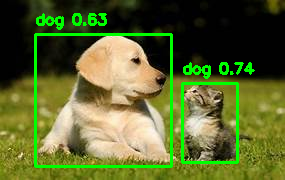

In [1]:
import torch
import cv2
import numpy as np
from PIL import Image
# Import the necessary patch for displaying images in Colab
from google.colab.patches import cv2_imshow

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load an image using OpenCV
image_path = '/content/exp 4.jpg'  # Replace with your image path
img = cv2.imread(image_path)

# Convert the image to RGB (YOLOv5 expects RGB format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to PIL Image (YOLOv5 expects PIL format)
pil_img = Image.fromarray(img_rgb)

# Perform object detection
results = model(pil_img)

# Display results
results.show()  # This will show the image with bounding boxes

# Convert results to pandas DataFrame
df = results.pandas().xyxy[0]  # Bounding box coordinates
print(df)  # Print detected objects and their coordinates

# Draw bounding boxes
for index, row in df.iterrows():
    x1, y1, x2, y2, conf, cls, label = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax']), row['confidence'], int(row['class']), row['name']
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, f'{label} {conf:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with bounding boxes using cv2_imshow
# Instead of cv2.imshow('Object Detection', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()